# Investigating Halo Quantities in the Skysim and CosmoDC2 Extragalactic Catalogs

In this example script we show how to access and interpret the additional halo quantities available in the skysim catalog.

Owner: Patricia Larsen

Last verified run: April 26, 2024 by @patricialarsen

This notebook demonstrates how to access the extra galactic catalog through the Generic Catalog Reader (GCR, https://github.com/yymao/generic-catalog-reader) with a focus on skysim halo quantities.

Objectives:

After working through and studying this Notebook you should be able to

- Access the cosmoDC2 and skysim extragalactic catalogs through the GCR
- Match cosmoDC2 and skysim galaxies to their host halos from the Outer Rim simulation
- Access skysim-specific cluster halo quantities and understand how to use them 

Logistics: This notebook is intended to be run through the JupyterHub NERSC interface available here: https://jupyter.nersc.gov. To setup your NERSC environment, please follow the instructions available here: https://confluence.slac.stanford.edu/display/LSSTDESC/Using+Jupyter+at+NERSC

In [1]:
import GCRCatalogs
import numpy as np
from astropy.table import Table
from GCR import GCRQuery
import matplotlib.pyplot as plt
%matplotlib inline


### Reading catalog
We load in the catalog with the "load_catalog" command, and then the values with the "get_quantities" command using filters to select sub-samples of the catalog.

Help for error messages:
If this fails to find the appropriate quantities, check that the desc-python kernel is being used and if this is not available source the kernels by running the following command on a terminal at nersc: "source /global/common/software/lsst/common/miniconda/kernels/setup.sh"

We are loading in a small version of the skysim5000 catalog - this contains the same information as the full catalog but with a smaller sky area.

In [2]:
gc_cdc2 = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')
gc_sky = GCRCatalogs.load_catalog('skysim5000_v1.1.2_small')


### Previous non-native quantities

Let's first discuss the cosmoDC2 quantities. Previously the main halo quantities you would have access to are the halo mass and ID (you can then also access their positions and velocities through looking at the halo's central galaxies using an "is_central" flag). 

In [3]:
for item in gc_cdc2.list_all_quantities():
    if 'halo' in item:
        print(item)

halo_mass
halo_id




You could then access further quantities in the native_quantities. To understand these we must talk a little about the simulation procedure. In this we get a halo from the Outer Rim simulation, and match it to one in the MDPL2 simulation to get a sampling of halo quantities. The "target" halo refers to the Outer Rim halo which comes from the dark matter simulation, and the "host" halo refers to the properties of the MDPL2 halo. I believe the "source" halo refers to the halo from the Galacticus run in the AlphaQ simulation.   

To quote the CosmoDC2 paper:
"Briefly, for every host
halo in the Outer Rim, we randomly select a host halo in
MDPL2 of similar mass, and map the galaxy content of the
selected MDPL2 halo into the Outer Rim halo, preserving
the halo-centric positions and velocities of the galaxies"

Generally speaking for halo properties you'll want to look at those of the target halo, however if you want more specific host-centric galaxy positions then the host halo information may be useful, and the source information could be useful for further quantities from the semi-analytic model. (PLEASE look at figure 1 of the paper if this is all confusing, it's a bit of an involved process)

In [5]:
for item in gc_cdc2.list_all_native_quantities():
    if 'target_halo' in item:
        print(item)
print(' ')
for item in gc_cdc2.list_all_native_quantities():
    if 'host_halo' in item:
        print(item)
print(' ')
for item in gc_cdc2.list_all_native_quantities():
    if 'source_halo' in item:
        print(item)

baseDC2/target_halo_redshift
baseDC2/target_halo_x
baseDC2/target_halo_vx
baseDC2/target_halo_vz
baseDC2/target_halo_mass
baseDC2/target_halo_id
baseDC2/target_halo_z
baseDC2/target_halo_y
baseDC2/target_halo_vy
baseDC2/target_halo_fof_halo_id
 
baseDC2/host_halo_x
baseDC2/host_halo_y
baseDC2/host_halo_vz
baseDC2/host_halo_vy
baseDC2/host_halo_vx
baseDC2/host_halo_mvir
baseDC2/host_halo_z
 
baseDC2/source_halo_id
baseDC2/source_halo_mvir


## Properties 

Let's talk about these a little: the target halo information has 

- redshift 
- central potential point x,y,z in comoving Mpc/h 
- mean halo velocity vx, vy, vz in km/s
- halo mass in Msun/h 
- halo ID -> a cosmoDC2-specific halo ID 
- fof halo ID -> the fof halo tag corresponding to the Outer-Rim simulation (note this is only unique per simulation step)

The host halo (where the host-centric galaxy positions come from) information has 
 
- central position in MDPL2 simulation x,y,z in comoving Mpc/h 
- mean halo velocity vx, vy, vz in km/s
- halo mass in Msun/h

The source halo information has 

- source halo id (FOF halo tag from the AlphaQ simulation) 
- halo mass in Msun/h


You'll occassionally find fill values, this happens in several situations, e.g. synthetic field galaxies added without host halos. I'll add those fill values here once I track them all down. 

Also note the native quantity information might not match GCR conventions, so please double check units (especially Msun vs Msun/h)

In [19]:
# let's add some plots to better understand these here
# start by asking for a representative set of target halo quantities and normal information for a small set of cluster-mass halos
# we set the is_central flag to ensure we only have one galaxy per halo

cluster_data = gc_cdc2.get_quantities(['ra','dec', 'x','vx', 'redshift', 'halo_mass', 'halo_id','baseDC2/target_halo_mass','baseDC2/target_halo_id',
                                      'baseDC2/target_halo_x','baseDC2/target_halo_vx', 'baseDC2/target_halo_redshift'], 
                                 filters=['is_central', 'halo_mass > 1e14', 'redshift < 0.2']) 


We check that the x positions and velocities from the central galaxies line up with the x positions and velocities of the halos

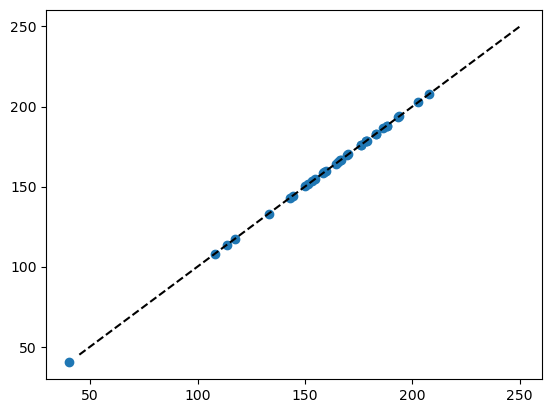

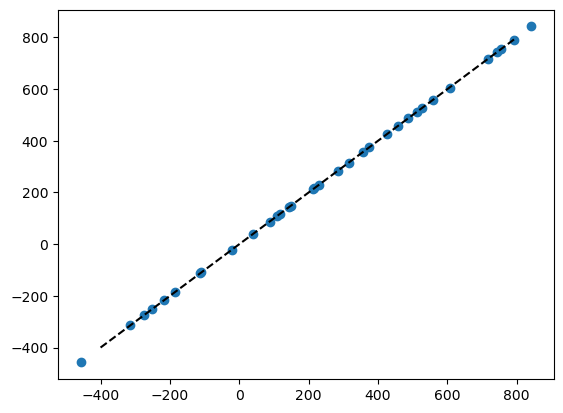

In [25]:
plt.figure()
plt.scatter(cluster_data['x'], cluster_data['baseDC2/target_halo_x'])
plt.plot(np.linspace(45,250,200),np.linspace(45,250,200),'k--')
plt.show()
plt.figure()
plt.scatter(cluster_data['vx'], cluster_data['baseDC2/target_halo_vx'])
plt.plot(np.linspace(-400,800,200),np.linspace(-400,800,200),'k--')
plt.show()

Next let's look at the redshift  - there's more scatter there because the line-of-sight velocity is also taken into account in the redshift measurement, and the halo redshift is the cosmological redshift (you can get these to match by selecting the cosmological redshift for the galaxies). 

The masses line up *only* if you take into account the change in units between halo_mass (in Msun) and the target_halo_mass (in Msun/h).

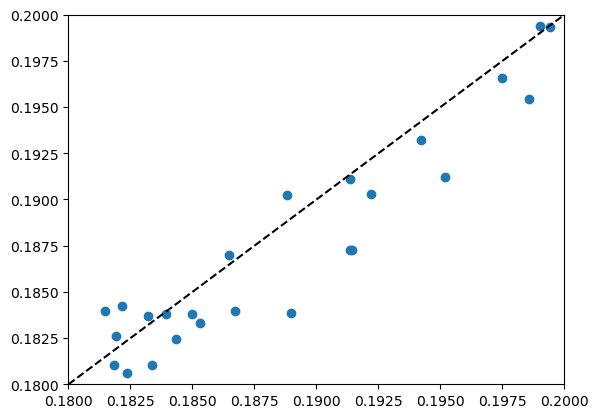

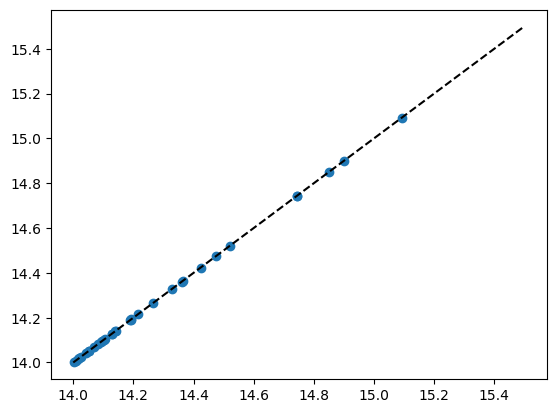

In [39]:
plt.figure()
plt.scatter(cluster_data['redshift'], cluster_data['baseDC2/target_halo_redshift'])
plt.plot(np.linspace(0.18,0.2,200),np.linspace(0.18,0.2,200),'k--')
plt.xlim([0.18,0.2])
plt.ylim([0.18,0.2])

plt.show()
plt.figure()
plt.scatter(np.log10(cluster_data['halo_mass']), np.log10(cluster_data['baseDC2/target_halo_mass']/0.71)) # note h = 0.71 here
plt.plot(np.linspace(14,15.5,200),np.linspace(14,15.5,200),'k--')
plt.show()

Finally we can see that the halo id matches with the target halo id (note this likely doesn't match with the fof halo id as the id convention has been altered to ensure unique identifiers)

In [46]:
print((cluster_data['halo_id']==cluster_data['baseDC2/target_halo_id']).all())

True


### Skysim

We take this one step farther with skysim by addding access to extra quantities of the target halos. There are two types of labels here, sod_halo quantities which are M200c quantities from the Outer Rim simulation, and target_halo quantities which are later derived quantities

- sod_halo_mass is the M200c value for the halo (Msun/h)
- sod_halo_radius is the R200c value (Mpc/h comoving)
- sod_halo_cdelta is the concentration c (unitless)
- sod_halo_cdelta_error is the error in the concentration measurement

For the target halo quantities we then add further information on their orientation and ellipcitity. Note that these quantities only exist from the simulation above a certain mass limit, which is 10,000 particles or a mass of 10^13 (not the right number, add here) or above. Below this we orient galaxies according to a random draw from a distribution, and the corresponding values are given instead. 

These are 

- target_halo_axis_A_x,y,z - direction of the halo major axis (eigenvector of the inertia tensor)
- target_halo_axis_A,B,C_length - the length of the halo axes in Mpc/h
- target_halo_axis_ellipticity,prolaticity -> look at the exact axis ratio to e/p conversion in the github here: https://github.com/LSSTDESC/cosmodc2/blob/4a41384fa49f29e1a6c9b18d1cbe016c58b3731d/cosmodc2/triaxial_satellite_distributions/axis_ratio_model.py

*note these are from I believe the simple inertia tensor of the FOF halo particles





In [18]:
for item in gc_sky.list_all_native_quantities():
    if item not in gc_cdc2.list_all_native_quantities():
        if 'target_halo' in item:
            print(item)
print(' ')
for item in gc_sky.list_all_native_quantities():
    if item not in gc_cdc2.list_all_native_quantities():
        if 'sod_halo' in item:
            print(item)


baseDC2/target_halo_axis_A_x
baseDC2/target_halo_axis_A_y
baseDC2/target_halo_ellipticity
baseDC2/target_halo_axis_A_z
baseDC2/target_halo_axis_C_length
baseDC2/target_halo_prolaticity
baseDC2/target_halo_axis_B_length
baseDC2/target_halo_axis_A_length
 
baseDC2/sod_halo_cdelta
baseDC2/sod_halo_radius
baseDC2/sod_halo_mass
baseDC2/sod_halo_cdelta_error


Let's plot some skysim data

In [62]:
cluster_data = gc_sky.get_quantities(['ra','dec', 'x','vx', 'redshift', 'halo_mass', 'halo_id',
                                       'baseDC2/target_halo_mass','baseDC2/sod_halo_mass','baseDC2/sod_halo_cdelta','baseDC2/sod_halo_radius',
                                      'baseDC2/target_halo_ellipticity','baseDC2/target_halo_prolaticity', 'baseDC2/target_halo_axis_A_length',
                                     'baseDC2/target_halo_axis_B_length', 'baseDC2/target_halo_axis_C_length'], 
                                 filters=['is_central', 'halo_mass > 1e14', 'redshift < 0.2']) 


First let's look at the standard SOD quantiites - SOD masses should roughly agree with FOF masses, with a fair bit of scatter. This is actually an old version of skysim with a bug where the concentrations were replaced by masses! This is why the concentration looks weird and we need to update the catalog path here once the small catalog is out for the new version. 

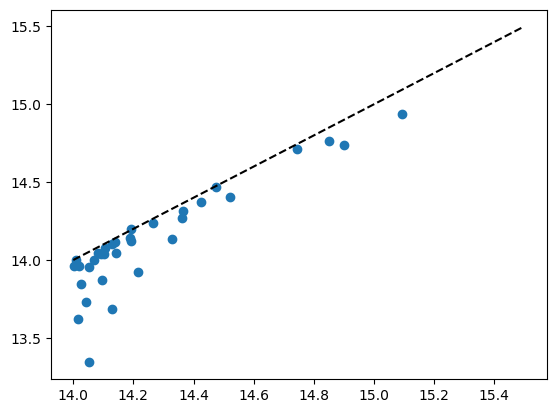

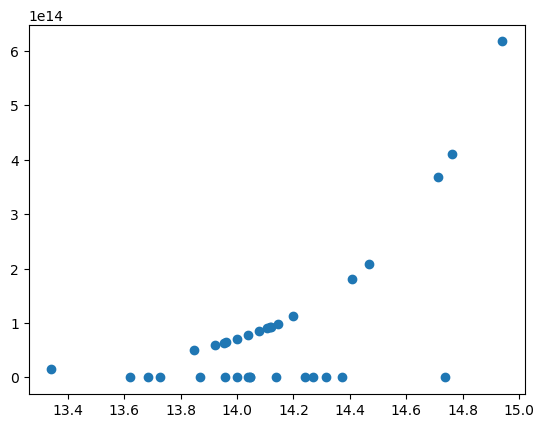

In [53]:
plt.figure()
plt.scatter(np.log10(cluster_data['halo_mass']), np.log10(cluster_data['baseDC2/sod_halo_mass']/0.71)) # note h = 0.71 here
plt.plot(np.linspace(14,15.5,200),np.linspace(14,15.5,200),'k--')
plt.show()
plt.figure()
plt.scatter(np.log10(cluster_data['baseDC2/sod_halo_mass']/0.71), cluster_data['baseDC2/sod_halo_cdelta']) # note h = 0.71 here
plt.show()

Now let's look at the axis length, this should be on the same order of magnitude as the r200 value

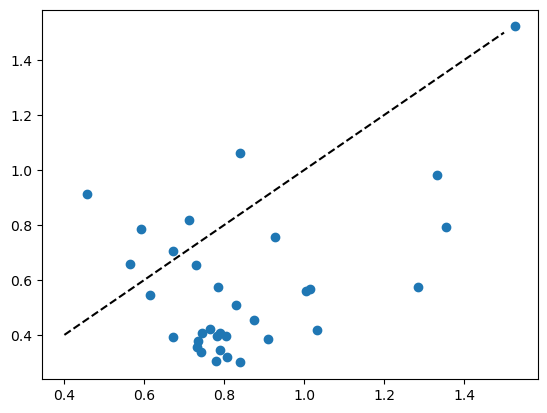

In [60]:
plt.figure()
plt.scatter(cluster_data['baseDC2/sod_halo_radius'],cluster_data['baseDC2/target_halo_axis_A_length']) # note check for h-unit and a questions
plt.plot(np.linspace(0.4,1.5,200),np.linspace(0.4,1.5,200),'k--')
plt.show()

Finally ellipticity and prolaticity should be dependent on the axis ratios - we take the equations exactly from the code to confirm the definitions

In [63]:

def calculate_ellipticity_prolaticity_from_axis_ratios(b, c):
    """
    """
    b = np.atleast_1d(b)
    c = np.atleast_1d(c)
    assert np.all(b > 0), "b must be strictly positive"
    assert np.all(b <= 1), "b cannot exceed unity"
    assert np.all(c > 0), "c must be strictly positive"
    assert np.all(b >= c), "c cannot exceed b"

    lam = 1. + b**2 + c**2
    num = 1. - c**2
    denom = 2*lam
    e = num/denom
    p = (1. - 2*b**2 + c**2)/denom
    return e, p


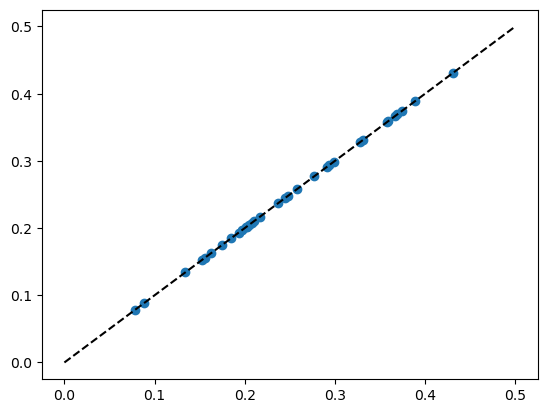

In [65]:
ax1 = cluster_data['baseDC2/target_halo_axis_C_length']/cluster_data['baseDC2/target_halo_axis_A_length']
ax2 = cluster_data['baseDC2/target_halo_axis_B_length']/cluster_data['baseDC2/target_halo_axis_A_length']
ellip,prolat = calculate_ellipticity_prolaticity_from_axis_ratios(ax2, ax1)

plt.figure()
plt.scatter(cluster_data['baseDC2/target_halo_ellipticity'],ellip) # note check for h-unit and a questions
plt.plot(np.linspace(0.0,0.5,200),np.linspace(0.0,0.5,200),'k--')
plt.show()

We leave it as an exercise to the reader to use and investigate the properties however you'd like, but before we end this tutorial let's match up the galaxies to their host halos to put it all together

In [67]:
# first we read in both the galaxy data and the halo data (halo data involves cutting on an is_central flag to keep unique halos
# and here we've cut on halo mass and redshift as well to match to specific clusters)

galaxy_data = gc_sky.get_quantities(['ra', 'dec', 'mag_r', 'halo_id'], filters=['mag_r < 19','redshift < 0.25'])
cluster_data = gc_sky.get_quantities(['ra','dec', 'halo_mass', 'halo_id', 'baseDC2/sod_halo_mass','baseDC2/target_halo_ellipticity'], 
                                 filters=['is_central', 'halo_mass > 1e14', 'redshift < 0.2'])

We now plot galaxies in the first three halos, matching using the halo id, as in other tutorials, but this time also printing the sod halo mass

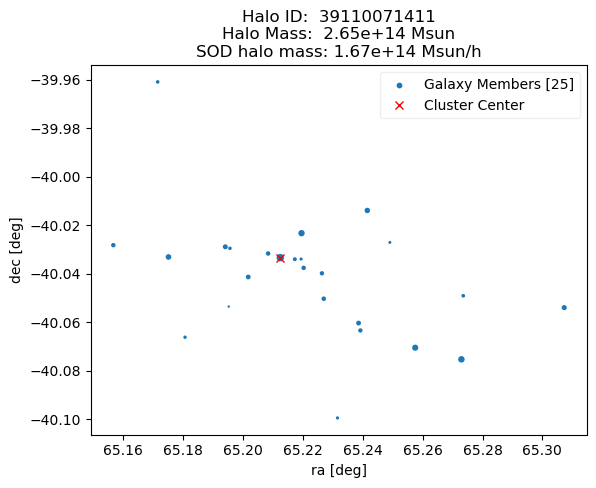

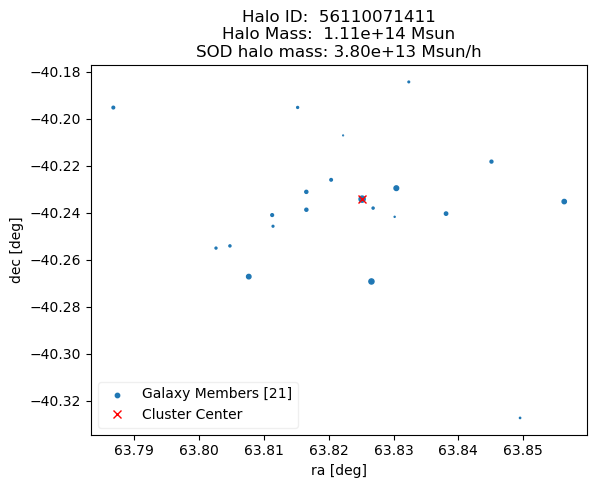

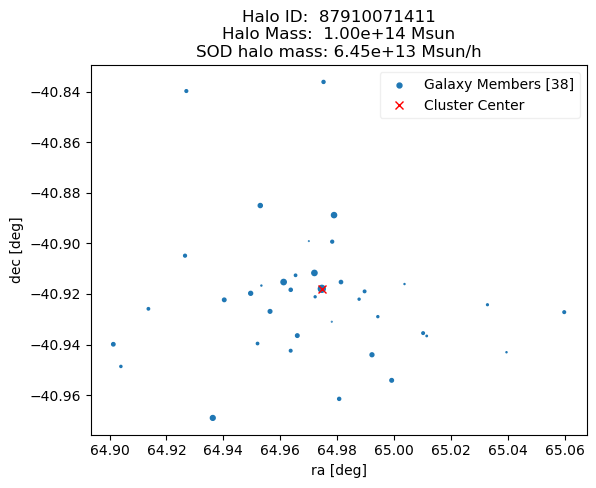

In [68]:
cluster_data = Table(cluster_data)
for i, cluster in enumerate(cluster_data):
    if (i >= 3):
        break # plot only the first 3
    members = GCRQuery('halo_id == {}'.format(cluster['halo_id'])).filter(galaxy_data)
    plt.figure()
    plt.scatter(
        members['ra'], 
        members['dec'], 
        s=(19-members['mag_r'])*8, 
        label='Galaxy Members [{}]'.format(len(members['ra']))
    )
    plt.plot(cluster['ra'], cluster['dec'], 'xr', label='Cluster Center')
    plt.legend(loc='best', framealpha=0.3)
    plt.xlabel(r'ra [deg]')
    plt.ylabel(r'dec [deg]')
    plt.title('Halo ID:  {}\nHalo Mass:  {:.2e} Msun\nSOD halo mass: {:.2e} Msun/h'.format(cluster['halo_id'], cluster['halo_mass'], cluster['baseDC2/sod_halo_mass']))
plt.show()
